In [1]:
from scipy import stats 

In [2]:
stats.norm.cdf(70,60,10)

0.8413447460685429

In [3]:
stats.norm.cdf(680,711,29)

0.14254260383881612

In [4]:
stats.norm.cdf(-1.06)

0.1445722996639096

In [5]:
stats.norm.cdf(740,711,29)-stats.norm.cdf(697,711,29)

0.5267111786415019

In [6]:
import pandas as pd 
import numpy as np 

In [7]:
beml_df = pd.read_csv("BEML.csv")

In [8]:
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [9]:
glaxo_df = pd.read_csv("GLAXO.csv")

In [10]:
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [11]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]  

In [12]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [13]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [14]:
beml_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


In [15]:
glaxo_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


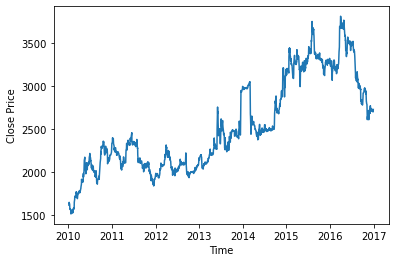

In [31]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_df.Close)
plt.xlabel('Time');
plt.ylabel('Close Price');

AttributeError: module 'matplotlib.pyplot' has no attribute 'pylabel'

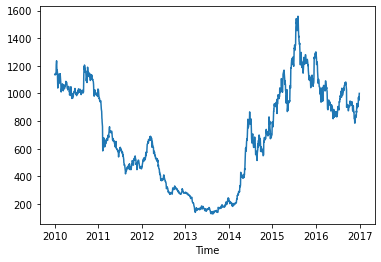

In [17]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.pylabel('Close');

In [18]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [22]:
#drop first row since it is NAN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()
glaxo_df.gain

Date
2010-01-05   -0.005444
2010-01-06    0.013422
2010-01-07    0.006225
2010-01-08   -0.005398
2010-01-11   -0.006312
                ...   
2016-12-26   -0.001283
2016-12-27   -0.007986
2016-12-28    0.000148
2016-12-29    0.009529
2016-12-30    0.000697
Name: gain, Length: 1738, dtype: float64

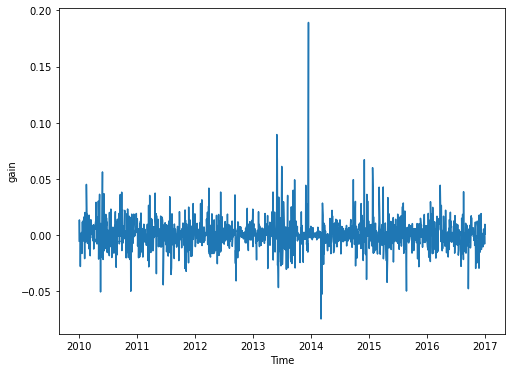

In [24]:
plt.figure(figsize = (8, 6));
plt.plot(glaxo_df.index, glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

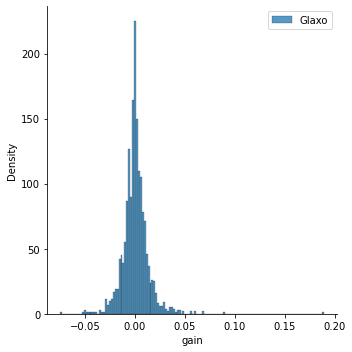

In [25]:
sn.displot(glaxo_df.gain, label = 'Glaxo');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

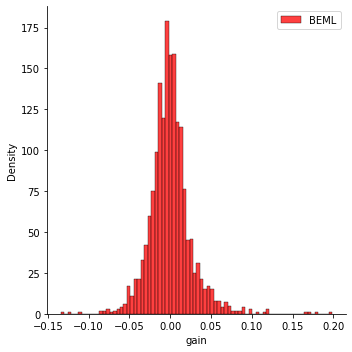

In [27]:
sn.displot(beml_df.gain, label = 'BEML',color="r");
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

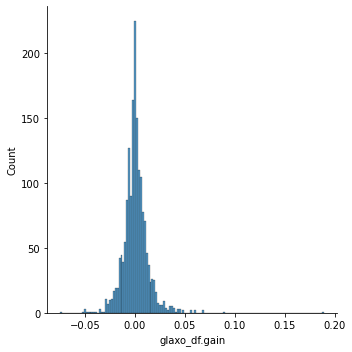

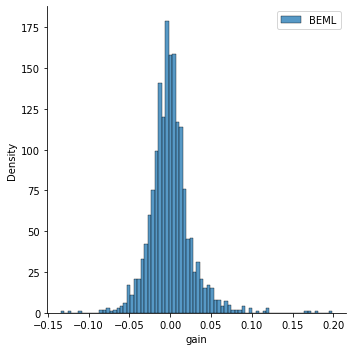

In [40]:
X = pd.DataFrame(columns = ["beml_df.gain","glaxo_df.gain"])
X["beml_df.gain"] = pd.Series(beml_df.gain)
X["glaxo_df.gain"] = pd.Series(glaxo_df.gain)
sn.displot(X['glaxo_df.gain'],label = 'Glaxo');
sn.displot(X['beml_df.gain'],label = 'BEML');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

In [44]:
print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard Deviation:  0.0134


In [47]:
print('Mean:', round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.std(), 4))

Mean: 0.0003
Standard Deviation:  0.0264


In [51]:
from scipy import stats
#probability of making 2% loss or higher in Glaxo
stats.norm.cdf(-0.02, loc=glaxo_df.gain.mean(), scale=glaxo_df.gain.std())

0.06352488667177397

In [54]:
#probability of making 2% gain or higher in GLAXO
1-stats.norm.cdf(0.02, loc=glaxo_df.gain.mean(), scale=glaxo_df.gain.std())

0.07104511457618568

In [61]:
#Probability of making 2% loss or higher in BEML
stats.norm.cdf( -0.02, loc=beml_df.gain.mean(), scale=beml_df.gain.std())  

0.22155987503755292

In [62]:
#Probability of making 2% gain or higher in BEML
1-stats.norm.cdf( 0.02, loc=beml_df.gain.mean(), scale=beml_df.gain.std())  

0.22769829484075343